<a href="https://colab.research.google.com/github/imWadson/ExLivery/blob/master/Sistema_de_Recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Modelagem de dados
import pandas as pd
import numpy as np

#Analise gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Avisos
import warnings
warnings.filterwarnings('ignore')

#Ajustes pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

#Ajustes matplot
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

# **Importação dos Dados**

In [3]:
Dados_Livros = pd.read_csv('Books.csv')
Dados_Avaliacao = pd.read_csv('Ratings.csv')
Dados_Usuario = pd.read_csv('Users.csv')

Dados_Livros.shape, Dados_Avaliacao.shape, Dados_Usuario.shape


((271360, 8), (1014705, 3), (278858, 3))

In [4]:
Dados_Livros.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
Dados_Livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
Dados_Avaliacao.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
Dados_Avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014705 entries, 0 to 1014704
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1014705 non-null  int64 
 1   ISBN         1014705 non-null  object
 2   Book-Rating  1014705 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 23.2+ MB


In [8]:
Dados_Usuario.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
Dados_Usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#**Modelagem dos Dados**



In [10]:
Tab_Cruzada = Dados_Livros.merge(Dados_Avaliacao, how='inner', on='ISBN')
Tab_Cruzada = Tab_Cruzada.merge(Dados_Usuario, how='inner', on='User-ID')

Tab_Cruzada.shape

(909977, 12)

In [11]:
Tab_Cruzada.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN


In [12]:
Tab_Cruzada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909977 entries, 0 to 909976
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 909977 non-null  object 
 1   Book-Title           909977 non-null  object 
 2   Book-Author          909976 non-null  object 
 3   Year-Of-Publication  909977 non-null  object 
 4   Publisher            909975 non-null  object 
 5   Image-URL-S          909977 non-null  object 
 6   Image-URL-M          909977 non-null  object 
 7   Image-URL-L          909973 non-null  object 
 8   User-ID              909977 non-null  int64  
 9   Book-Rating          909977 non-null  int64  
 10  Location             909977 non-null  object 
 11  Age                  667382 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 90.3+ MB


In [20]:
'''
 Laço de repetição para encontrar string na coluna Ano

 for linha in Tab_Cruzada['Year-Of-Publication'].value_counts().index :
   print(linha) 

'''


Tab_Cruzada.iloc[332194, 3] = ''
Tab_Cruzada.iloc[413393, 3] = ''
Tab_Cruzada.iloc[414647, 3] = ''
Tab_Cruzada.iloc[267333, 3] = ''


Tab_Cruzada['Year-Of-Publication'] = pd.to_numeric(Tab_Cruzada['Year-Of-Publication'])

In [21]:
Tab_Cruzada.dtypes

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object

In [22]:
Tab_Cruzada.head(5)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [23]:
Tab_Cruzada['Location'].head(5)

0    stockton, california, usa
1     timmins, ontario, canada
2     timmins, ontario, canada
3     timmins, ontario, canada
4     timmins, ontario, canada
Name: Location, dtype: object

In [24]:
Tab_Cruzada['Location'].tail(5)

909972        sydney, new south wales, australia
909973    wollongong, new south wales, australia
909974               zürich, zürich, switzerland
909975               zürich, zürich, switzerland
909976               barcelona, barcelona, spain
Name: Location, dtype: object

In [27]:
def Extrair_Pais (Região):
  
  Registro = Região.split(',')

  Fracao = Registro[-1].upper()

  return Fracao

Tab_Cruzada['Pais'] = Tab_Cruzada['Location'].apply(Extrair_Pais)

Tab_Cruzada.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Pais
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,USA
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,CANADA
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,CANADA
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,CANADA


In [28]:
Tab_Cruzada.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         8
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    242595
Pais                        0
dtype: int64

In [31]:
Tab_Cruzada.nunique()

ISBN                   252397
Book-Title             225457
Book-Author             95183
Year-Of-Publication       112
Publisher               15825
Image-URL-S            252116
Image-URL-M            252116
Image-URL-L            252113
User-ID                 81016
Book-Rating                11
Location                20670
Age                       137
Pais                      268
dtype: int64

In [35]:
Tab_Cruzada.rename(
    columns={
        'Book-Title': 'Titulo',
        'Book-Author': 'Autor',
        'Year-Of-Publication': 'Ano_Publicacao',
        'Publisher': 'Editora',
        'Book-Rating': 'Avaliacao',
        'Location': 'Localização',
        'Age': 'Idade'  
    }, inplace=True
)


Tab_Cruzada.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'User-ID', 'Avaliacao', 'Localização',
       'Idade', 'Pais'],
      dtype='object')

#**Visualização de Dados - Exploração**

In [36]:
Tab_Cruzada.describe()

,Ano_Publicacao,User-ID,Avaliacao,Idade
count,909969.000000,909977.000000,909977.000000,667382.000000
mean,1968.216839,124799.398801,2.851708,37.737023
std,231.067268,72191.586194,3.857391,14.231881
min,0.000000,2.000000,0.000000,0.000000
25%,1992.000000,60569.000000,0.000000,29.000000
50%,1997.000000,125303.000000,0.000000,36.000000
75%,2001.000000,187145.000000,7.000000,46.000000
max,2050.000000,278854.000000,10.000000,244.000000


In [39]:
Tab_Cruzada = Tab_Cruzada.loc[ Tab_Cruzada['Avaliacao'] > 0]

Tab_Cruzada.describe()

,Ano_Publicacao,User-ID,Avaliacao,Idade
count,340271.000000,340272.000000,340272.000000,239027.000000
mean,1965.477493,120252.201965,7.626220,37.032959
std,243.885426,71422.010645,1.838504,13.811574
min,0.000000,8.000000,1.000000,0.000000
25%,1992.000000,58397.000000,7.000000,28.000000
50%,1997.000000,116220.000000,8.000000,35.000000
75%,2001.000000,181176.000000,9.000000,46.000000
max,2050.000000,278854.000000,10.000000,244.000000


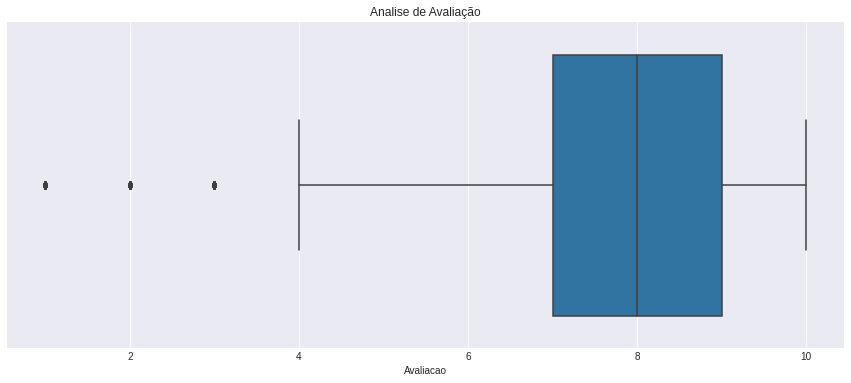

In [40]:
plt.title('Analise de Avaliação')
sns.boxplot(data=Tab_Cruzada, x='Avaliacao')

In [44]:
Analise = Tab_Cruzada.groupby( by=['Titulo']).agg(
    Quantidade = ('Titulo', 'count'),
    Media = ('Avaliacao', 'mean'),
    Max = ('Avaliacao', 'max'),
    Mediana = ('Avaliacao', 'median')
)

Analise.head()

,Quantidade,Media,Max,Mediana
Titulo,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000,9,9.0
Dark Justice,1,10.000000,10,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857,10,7.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000,10,10.0
Flight of Fancy: American Heiresses (Zebra Ballad Romance),1,8.000000,8,8.0


In [45]:
Analise.sort_values('Quantidade', ascending=False).head()

,Quantidade,Media,Max,Mediana
Titulo,,,,
The Lovely Bones: A Novel,607,8.153213,10,8.0
Wild Animus,505,4.457426,10,4.0
The Da Vinci Code,442,8.423077,10,9.0
The Secret Life of Bees,364,8.527473,10,9.0
The Nanny Diaries: A Novel,347,7.400576,10,8.0


In [51]:
px.scatter(
    data_frame = Analise,
    x= 'Quantidade', 
    y= 'Media',
    title = 'Media x Quantidade',
    # marginal_y='rug',
    # marginal_x='histogram'
)

In [53]:
Analise.corr()

,Quantidade,Media,Max,Mediana
Quantidade,1.000000,0.018716,0.178811,0.036658
Media,0.018716,1.000000,0.892905,0.990248
Max,0.178811,0.892905,1.000000,0.891351
Mediana,0.036658,0.990248,0.891351,1.000000
